https://scikit-learn.org/1.5/modules/neural_networks_supervised.html

In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 46.5 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
data = r'/content/drive/MyDrive/intento_cosas/ica_reho_prom+label.csv'

Mounted at /content/drive


In [4]:
data = pd.read_csv(data, index_col=0)
data = data.sort_values(['file_name'])
data



,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./reho_101915_01.nii.gz,4.851050,8.934557,1.009496,-0.986279,6.920129,0.757348,4.465333,5.831309,9.766241,5.930193,...,3.823423,2.691417,6.230972,5.039629,-1.915926,5.225915,3.794130,1.622716,5.328263,1
./reho_101915_02.nii.gz,5.275216,11.731320,0.873135,-1.686231,6.675001,0.469278,5.419979,6.472130,9.990691,5.519007,...,4.649975,3.102005,7.403264,6.423296,-2.154638,6.583181,4.375299,1.678310,5.684392,1
./reho_101915_03.nii.gz,6.749046,15.163733,0.254102,-3.773838,8.224679,-0.237195,6.885178,9.584335,12.440333,6.853447,...,4.819746,3.889733,8.295607,8.044444,-1.770925,10.177304,4.061025,1.956976,7.006923,1
./reho_103515_01.nii.gz,6.509312,11.242213,1.553618,0.359568,9.052847,1.227878,7.125554,5.657683,13.315641,6.019889,...,8.024881,3.944511,9.899134,7.458506,-1.462247,6.832763,3.586823,1.408597,6.197708,2
./reho_103515_02.nii.gz,5.729052,11.515364,1.200494,0.400481,8.573733,1.017667,6.627432,5.554697,11.862908,5.992600,...,6.625568,3.731379,9.201929,6.487220,-1.397284,6.163627,3.726771,1.226855,5.831609,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./reho_987983_02.nii.gz,4.907274,9.204361,1.783036,0.709174,6.887432,1.343527,5.294669,4.770951,10.352123,6.049123,...,10.487590,2.799107,7.706358,8.185527,-2.380617,7.228336,3.713661,-0.056729,5.863193,1
./reho_987983_03.nii.gz,5.184092,9.729068,1.456657,1.029422,6.894690,1.012251,5.290791,4.736794,10.074184,6.044086,...,10.169754,2.883538,8.228572,9.075352,-2.577548,7.358075,3.448614,-0.103886,5.844279,1
./reho_993675_01.nii.gz,3.938976,7.356993,1.513454,-0.993187,6.607878,1.108848,4.866449,4.684625,10.054718,5.241269,...,5.750535,3.190792,6.898672,3.778946,-2.599448,5.363661,4.854314,1.053011,6.612396,1


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = data['label']  # Esta será nuestra etiqueta

print(X, y)

                         component_1  component_2  component_3  component_4  \
file_name                                                                     
./reho_101915_01.nii.gz     4.851050     8.934557     1.009496    -0.986279   
./reho_101915_02.nii.gz     5.275216    11.731320     0.873135    -1.686231   
./reho_101915_03.nii.gz     6.749046    15.163733     0.254102    -3.773838   
./reho_103515_01.nii.gz     6.509312    11.242213     1.553618     0.359568   
./reho_103515_02.nii.gz     5.729052    11.515364     1.200494     0.400481   
...                              ...          ...          ...          ...   
./reho_987983_02.nii.gz     4.907274     9.204361     1.783036     0.709174   
./reho_987983_03.nii.gz     5.184092     9.729068     1.456657     1.029422   
./reho_993675_01.nii.gz     3.938976     7.356993     1.513454    -0.993187   
./reho_993675_02.nii.gz     3.601168     5.996358     2.175008    -1.557387   
./reho_993675_03.nii.gz     3.927468     6.171160   

In [6]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.35714286, 0.32142857, 0.33928571, 0.39285714, 0.4       ])

In [7]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.36 accuracy with a standard deviation of 0.03


In [8]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]//3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos


# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

file_name
./reho_101915_01.nii.gz    1
./reho_101915_02.nii.gz    1
./reho_101915_03.nii.gz    1
./reho_103515_01.nii.gz    2
./reho_103515_02.nii.gz    2
                          ..
./reho_970764_02.nii.gz    1
./reho_970764_03.nii.gz    1
./reho_987983_01.nii.gz    1
./reho_987983_02.nii.gz    1
./reho_987983_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.44      0.86      0.59        42
           2       0.30      0.11      0.16        27

    accuracy                           0.42        93
   macro avg       0.25      0.32      0.25        93
weighted avg       0.29      0.42      0.31        93

file_name
./reho_101915_01.nii.gz    1
./reho_101915_02.nii.gz    1
./reho_101915_03.nii.gz    1
./reho_103515_01.nii.gz    2
./reho_103515_02.nii.gz    2
                          ..
./reho_987983_02.nii.gz    1
./reho_987983_03.nii.gz    1
./reho_99

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


file_name
./reho_104820_01.nii.gz    2
./reho_104820_02.nii.gz    2
./reho_104820_03.nii.gz    2
./reho_105923_01.nii.gz    2
./reho_105923_02.nii.gz    2
                          ..
./reho_930449_02.nii.gz    1
./reho_930449_03.nii.gz    1
./reho_993675_01.nii.gz    1
./reho_993675_02.nii.gz    1
./reho_993675_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.49      0.98      0.66        45
           2       1.00      0.09      0.17        33

    accuracy                           0.51        93
   macro avg       0.50      0.36      0.27        93
weighted avg       0.59      0.51      0.38        93



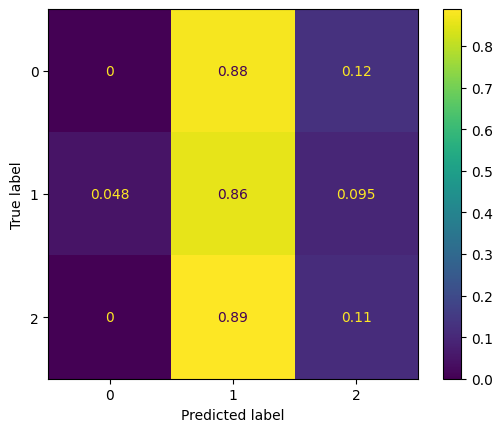

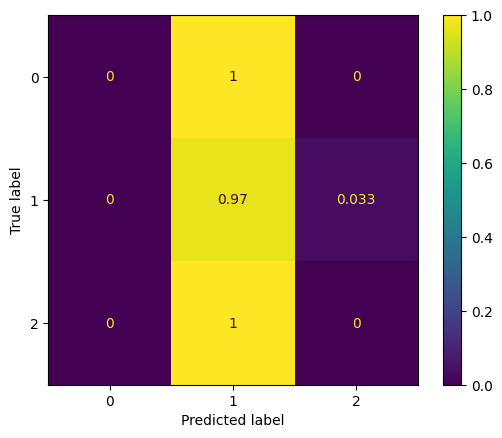

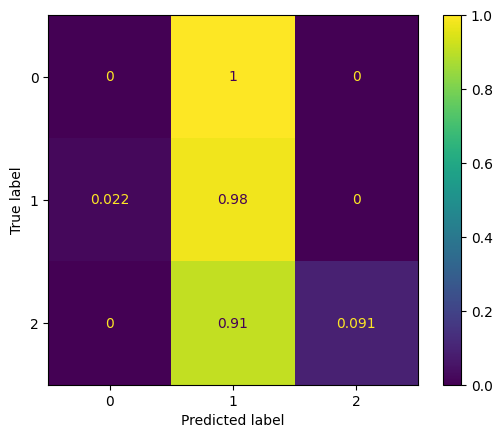

In [9]:
classif = svm.SVC()
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba usando iloc
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    classif.fit(X_train, y_train)
    y_pred = classif.predict(X_test)
    print(y_train)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


# Random Forest:

Probaremos ahora con otro modelo

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

file_name
./reho_101915_01.nii.gz    1
./reho_101915_02.nii.gz    1
./reho_101915_03.nii.gz    1
./reho_103515_01.nii.gz    2
./reho_103515_02.nii.gz    2
                          ..
./reho_970764_02.nii.gz    1
./reho_970764_03.nii.gz    1
./reho_987983_01.nii.gz    1
./reho_987983_02.nii.gz    1
./reho_987983_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.17      0.17      0.17        24
           1       0.29      0.21      0.25        42
           2       0.21      0.30      0.25        27

    accuracy                           0.23        93
   macro avg       0.22      0.23      0.22        93
weighted avg       0.24      0.23      0.23        93

file_name
./reho_101915_01.nii.gz    1
./reho_101915_02.nii.gz    1
./reho_101915_03.nii.gz    1
./reho_103515_01.nii.gz    2
./reho_103515_02.nii.gz    2
                          ..
./reho_987983_02.nii.gz    1
./reho_987983_03.nii.gz    1
./reho_99

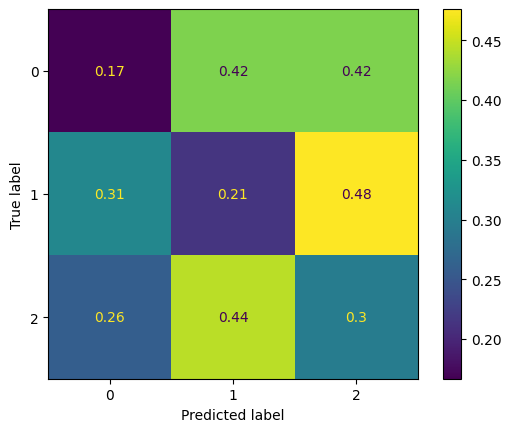

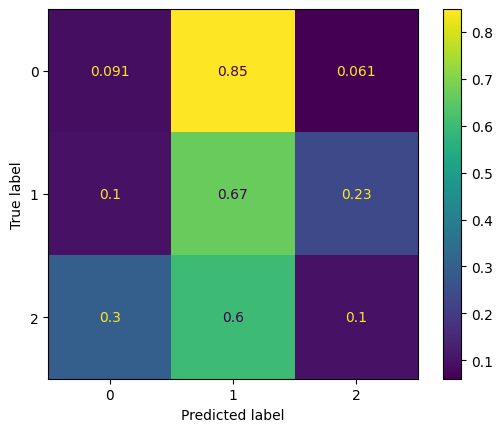

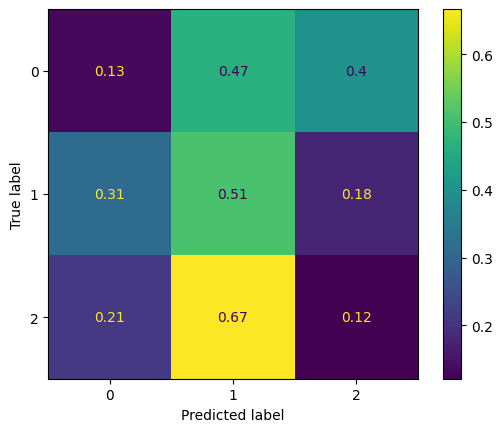

In [11]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba usando iloc
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    print(y_train)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [12]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

         Feature  Importance
2    component_3    0.075501
6    component_7    0.074442
4    component_5    0.065089
9   component_10    0.063726
0    component_1    0.057177
14  component_15    0.055435
13  component_14    0.055090
18  component_19    0.053971
7    component_8    0.052055
15  component_16    0.049484


In [13]:
# reho_ica_bien_0.csv

# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/ica_reho_prom+label_2.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/ica_reho_prom+label_0.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/ica_reho_prom+label_1.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./reho_103515_01.nii.gz,6.509312,11.242213,1.553618,0.359568,9.052847,1.227878,7.125554,5.657683,13.315641,6.019889,...,8.024881,3.944511,9.899134,7.458506,-1.462247,6.832763,3.586823,1.408597,6.197708,2
./reho_103515_02.nii.gz,5.729052,11.515364,1.200494,0.400481,8.573733,1.017667,6.627432,5.554697,11.862908,5.992600,...,6.625568,3.731379,9.201929,6.487220,-1.397284,6.163627,3.726771,1.226855,5.831609,2
./reho_103515_03.nii.gz,5.873187,12.198163,1.226072,0.069878,8.837843,0.877003,7.014360,5.786778,12.640762,5.896347,...,7.130936,3.751745,9.297285,6.478276,-1.463069,6.651599,3.724297,1.128637,6.128895,2
./reho_104820_01.nii.gz,5.051121,8.591036,1.438630,-1.107134,5.913361,2.374011,4.725841,6.253335,9.427891,5.730503,...,3.487404,3.081129,6.817803,2.375224,-2.080411,5.280489,2.870998,0.398237,5.533274,2
./reho_104820_02.nii.gz,4.878676,9.071563,1.085017,-1.003510,5.727219,2.365247,4.427677,6.339378,9.335486,5.735543,...,4.134480,3.251174,7.250917,2.716652,-1.873569,5.327305,2.867525,-0.003831,5.417336,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./reho_809252_02.nii.gz,4.858702,8.485738,0.026066,0.343408,5.353987,1.578511,3.964588,3.849724,9.576387,4.771415,...,4.664238,2.617765,7.759022,4.457610,-2.624579,3.921414,4.577204,0.735245,4.628605,2
./reho_809252_03.nii.gz,4.887816,8.393357,-0.102257,0.774610,5.481055,1.057689,4.307854,3.673599,9.134098,4.451309,...,4.389888,2.556688,8.345887,4.806151,-2.826107,3.914074,4.646918,0.740599,4.364669,2
./reho_822244_01.nii.gz,8.555139,8.588468,1.791112,-0.716423,7.893282,1.947488,5.116211,2.963019,9.977931,6.802530,...,5.758346,3.599994,7.441497,6.733581,-2.644391,6.986215,4.656314,1.414430,6.069710,2


In [15]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./reho_114823_01.nii.gz,3.928897,8.153719,1.124334,-0.596807,6.870164,2.216016,4.864120,4.561172,9.657594,5.887992,...,4.552331,1.740442,6.815071,4.668590,-0.565355,4.274058,4.321357,-0.121371,4.585759,0
./reho_114823_02.nii.gz,4.091068,9.453224,0.580355,-0.415314,6.352852,2.845500,4.837559,4.359457,10.139029,5.289115,...,5.492639,2.015362,7.999446,5.445802,-0.782898,4.860596,4.520050,-0.251267,4.526900,0
./reho_114823_03.nii.gz,4.499392,8.216928,0.719921,-0.457422,6.416242,2.095353,4.594903,4.199647,10.159582,5.501324,...,4.532319,1.683435,6.953901,4.449983,-0.990784,4.486297,4.423255,-0.016911,4.784688,0
./reho_117122_01.nii.gz,4.107118,9.262721,1.430845,0.254795,7.570312,2.257944,5.990232,6.408224,12.875697,5.561917,...,6.489005,3.528335,7.735646,4.519964,-2.009245,5.318605,3.885779,-0.655792,7.346954,0
./reho_117122_02.nii.gz,4.507854,9.705453,1.546558,0.512302,7.706228,2.303585,6.839356,7.019018,13.665464,5.917511,...,8.238289,3.574729,8.328530,4.760246,-1.997748,5.972250,4.271784,-0.974197,7.471225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./reho_861456_02.nii.gz,3.714515,12.958705,2.725805,-0.544223,6.932573,2.769029,6.946085,6.361621,10.398422,4.783355,...,6.079690,4.230977,7.530531,5.258931,0.028784,6.650243,5.308933,0.906025,6.235256,0
./reho_861456_03.nii.gz,4.421099,18.483767,2.684532,-1.785880,7.950572,2.383615,8.502112,8.262572,12.027786,5.788049,...,6.984319,4.909533,8.763231,5.548120,0.083455,8.787572,5.997498,0.652623,7.245297,0
./reho_902242_01.nii.gz,4.672908,7.089225,2.287477,-1.247261,5.890766,3.018721,4.293720,2.789309,24.197739,6.541162,...,6.777514,1.831632,6.618642,5.394358,-0.442277,5.996228,3.232699,0.367229,4.812310,0


In [16]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./reho_101915_01.nii.gz,4.851050,8.934557,1.009496,-0.986279,6.920129,0.757348,4.465333,5.831309,9.766241,5.930193,...,3.823423,2.691417,6.230972,5.039629,-1.915926,5.225915,3.794130,1.622716,5.328263,1
./reho_101915_02.nii.gz,5.275216,11.731320,0.873135,-1.686231,6.675001,0.469278,5.419979,6.472130,9.990691,5.519007,...,4.649975,3.102005,7.403264,6.423296,-2.154638,6.583181,4.375299,1.678310,5.684392,1
./reho_101915_03.nii.gz,6.749046,15.163733,0.254102,-3.773838,8.224679,-0.237195,6.885178,9.584335,12.440333,6.853447,...,4.819746,3.889733,8.295607,8.044444,-1.770925,10.177304,4.061025,1.956976,7.006923,1
./reho_128632_01.nii.gz,5.407336,9.942114,1.505430,0.241543,8.365633,1.852539,7.307602,6.350110,12.981817,6.515458,...,6.662036,2.968137,7.820297,5.387634,-1.510406,6.043880,6.184171,0.401268,6.458591,1
./reho_128632_02.nii.gz,5.207866,11.774221,0.772432,0.779648,7.505405,1.263476,8.198022,6.596849,12.001206,5.501316,...,6.811967,3.289019,9.832464,8.162948,-1.362974,7.329690,5.306697,-0.022180,5.372277,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./reho_987983_02.nii.gz,4.907274,9.204361,1.783036,0.709174,6.887432,1.343527,5.294669,4.770951,10.352123,6.049123,...,10.487590,2.799107,7.706358,8.185527,-2.380617,7.228336,3.713661,-0.056729,5.863193,1
./reho_987983_03.nii.gz,5.184092,9.729068,1.456657,1.029422,6.894690,1.012251,5.290791,4.736794,10.074184,6.044086,...,10.169754,2.883538,8.228572,9.075352,-2.577548,7.358075,3.448614,-0.103886,5.844279,1
./reho_993675_01.nii.gz,3.938976,7.356993,1.513454,-0.993187,6.607878,1.108848,4.866449,4.684625,10.054718,5.241269,...,5.750535,3.190792,6.898672,3.778946,-2.599448,5.363661,4.854314,1.053011,6.612396,1


In [17]:
from sklearn.model_selection import train_test_split

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 23*3 #int(len(data_men)*0.7)
prlof = 23*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['label']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['label'] = 'menstrual'
data_pr['label'] = 'proliferativo'
data_lut['label'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['label']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['label']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 67 muestras


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


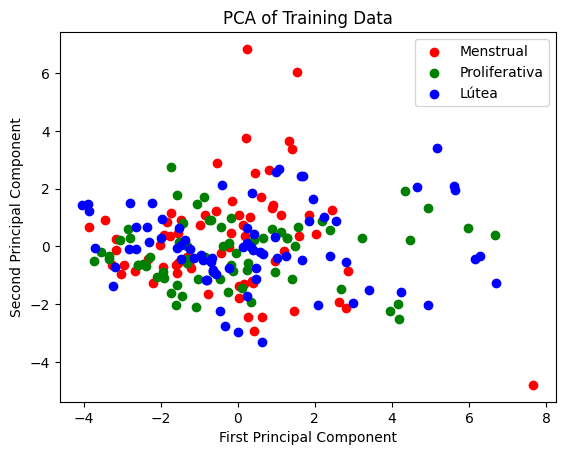

In [20]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [21]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [22]:
metrics.accuracy_score(y_test, y_predict)

0.31343283582089554

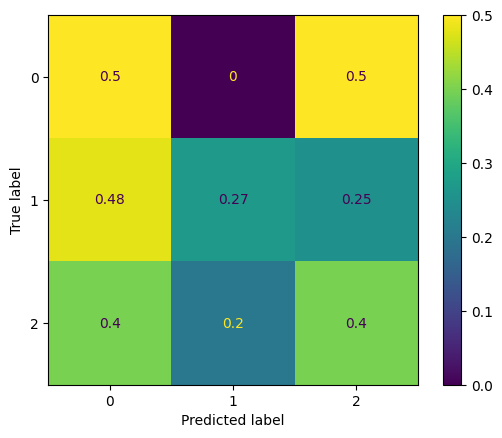

In [23]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [24]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.31343283582089554


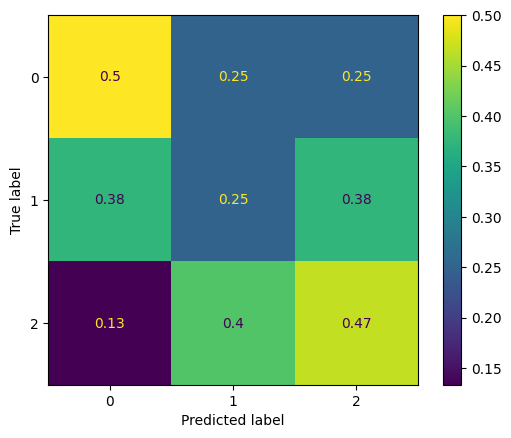

In [25]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.22388059701492538
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.25      0.06         4
           1       0.62      0.27      0.38        48
           2       0.06      0.07      0.06        15

    accuracy                           0.22        67
   macro avg       0.24      0.20      0.17        67
weighted avg       0.46      0.22      0.29        67



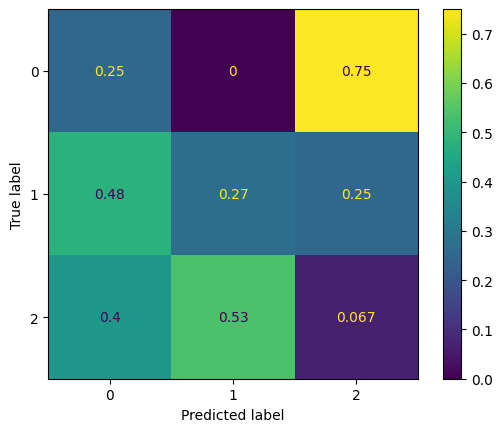

In [28]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [29]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

         Feature  Importance
18  component_19    0.073853
6    component_7    0.064623
0    component_1    0.062276
9   component_10    0.060784
13  component_14    0.060381
2    component_3    0.058935
12  component_13    0.058415
10  component_11    0.056267
5    component_6    0.051499
7    component_8    0.050850


In [30]:
pip install tensorflow

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3963 - loss: 1.1224 - val_accuracy: 0.4643 - val_loss: 1.0507
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4883 - loss: 1.0114 - val_accuracy: 0.5714 - val_loss: 1.0253
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5264 - loss: 0.9695 - val_accuracy: 0.5536 - val_loss: 1.0066
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6342 - loss: 0.9025 - val_accuracy: 0.5536 - val_loss: 0.9842
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6433 - loss: 0.8534 - val_accuracy: 0.6250 - val_loss: 0.9570
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6805 - loss: 0.8291 - val_accuracy: 0.6071 - val_loss: 0.9424
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7113 - loss: 0.7807 - val_accuracy: 0.5893 - val_loss: 0.9174
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7934 - loss: 0.7302 - val_accuracy: 0.6429 - val_los

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Matriz de confusión:
[[12  1  1]
 [ 2 19  2]
 [ 3  2 14]]


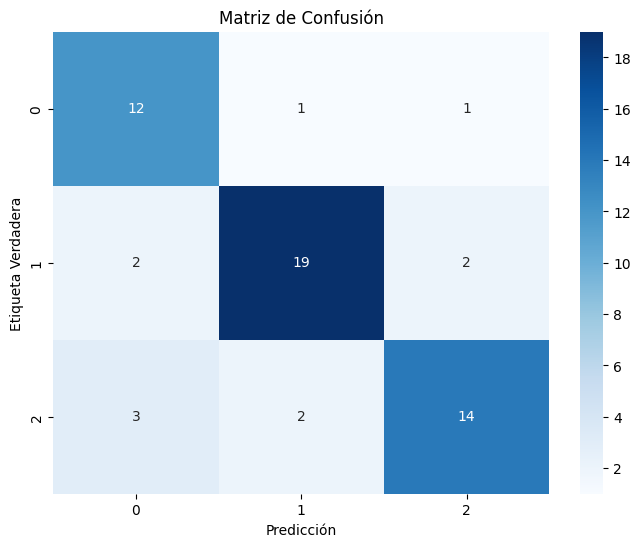

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [33]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3510 - loss: 1.1483 - val_accuracy: 0.1493 - val_loss: 1.2626
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5349 - loss: 1.0096 - val_accuracy: 0.1791 - val_loss: 1.2655
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5604 - loss: 0.9406 - val_accuracy: 0.2239 - val_loss: 1.2626
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5779 - loss: 0.8937 - val_accuracy: 0.3134 - val_loss: 1.2456
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6658 - loss: 0.8486 - val_accuracy: 0.2537 - val_loss: 1.2686
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7107 - loss: 0.8214 - val_accuracy: 0.2090 - val_loss: 1.3615
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7430 - loss: 0.7518 - val_accuracy: 0.2537 - val_loss: 1.3438
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7459 - loss: 0.7297 - val_accuracy: 0.2687 - val_loss: 1.39

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matriz de confusión:
[[ 3  0  1]
 [30 12  6]
 [ 4  6  5]]


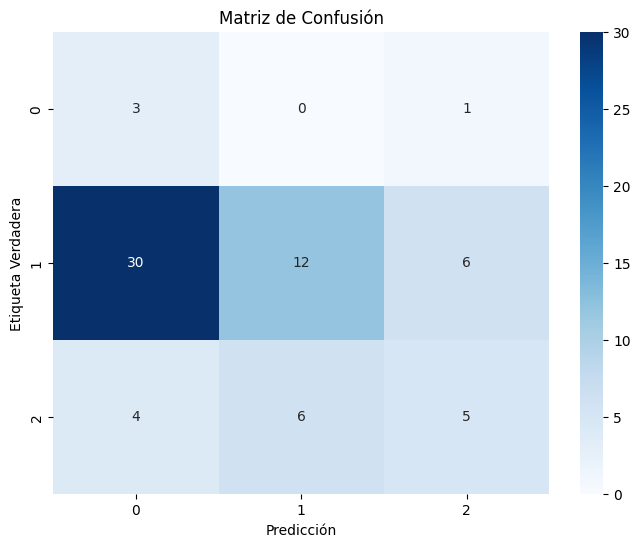

Reporte de clasificación:


TypeError: object of type 'numpy.int64' has no len()

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [64]:
men = 10*3
prlof = 10*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train2 = data_men.iloc[:men]
data_pro_train2 = data_pr.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_men_test2 = data_men.iloc[men:]
data_pro_test2 = data_pr.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_pro_train2 = data_pro_train2.drop(columns=['label'])
data_lut_train2 = data_lut_train2.drop(columns=['label'])
data_men_train2['label'] = '0'
data_pro_train2['label'] = '0'
data_lut_train2['label'] = '1'

data_pro_test2 = data_pro_test2.drop(columns=['label'])
data_lut_test2 = data_lut_test2.drop(columns=['label'])
data_men_test2['label'] = '0'
data_pro_test2['label'] = '0'
data_lut_test2['label'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_men_train2, data_pro_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_men_test2, data_pro_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['label']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['label']  # Esta será nuestra etiqueta



print(y_train2)
print(y_test2)

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: label, Length: 120, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
155    1
156    1
157    1
158    1
159    1
Name: label, Length: 160, dtype: object


<ipython-input-64-73110b0f990f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men_train2['label'] = '0'
<ipython-input-64-73110b0f990f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men_test2['label'] = '0'


In [65]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [66]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [67]:
metrics.accuracy_score(y_test2, y_predict2)

0.59375

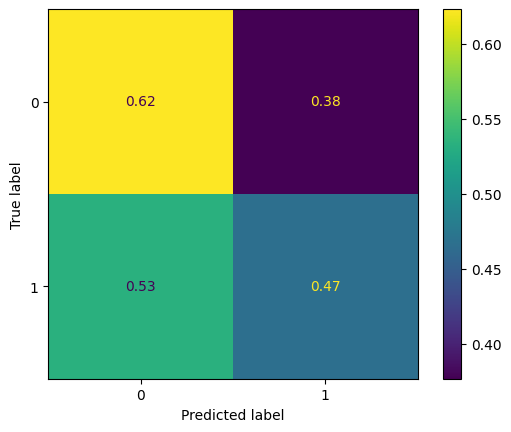

In [68]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [70]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.525
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.55      0.65       130
           1       0.17      0.40      0.24        30

    accuracy                           0.53       160
   macro avg       0.49      0.48      0.45       160
weighted avg       0.68      0.53      0.58       160



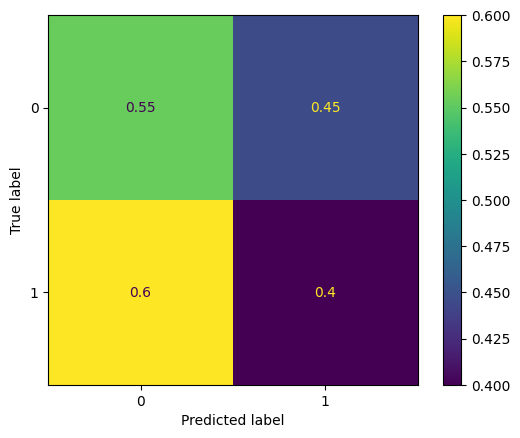

In [71]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [72]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [73]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5568 - loss: 0.6958 - val_accuracy: 0.7500 - val_loss: 0.6585
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6649 - loss: 0.6052 - val_accuracy: 0.7688 - val_loss: 0.6521
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7098 - loss: 0.5832 - val_accuracy: 0.7688 - val_loss: 0.6505
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7703 - loss: 0.5463 - val_accuracy: 0.7563 - val_loss: 0.6450
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8734 - loss: 0.4716 - val_accuracy: 0.7375 - val_loss: 0.6724
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9083 - loss: 0.4544 - val_accuracy: 0.7188 - val_loss: 0.6977
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9119 - loss: 0.4196 - val_accuracy: 0.7063 - val_loss: 0.7076
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9372 - loss: 0.3841 - val_accuracy: 0.7188 - val_loss: 0.7198
Epoch 9/50
8/8 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Matriz de confusión:
[[93 37]
 [14 16]]


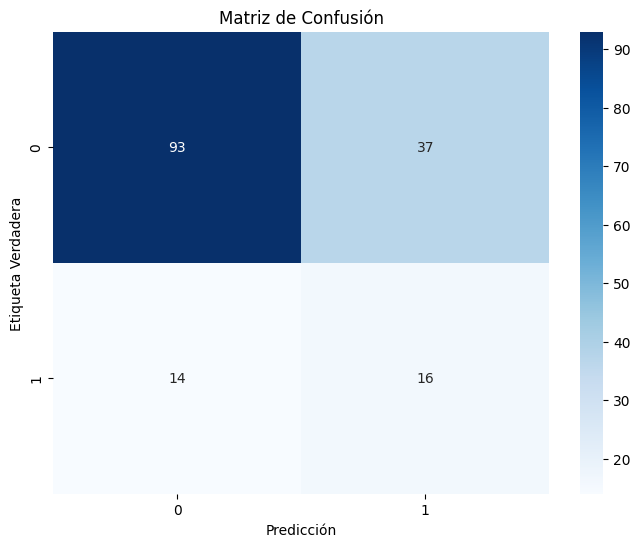

In [74]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()